/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: Undefin

                          feature  coefficient
0                            year     0.174245
1           poll_predicted_margin     1.040194
2             vep_turnout_percent    -0.385964
3                  incumb_party_d     0.135391
4                  incumb_party_r    -0.135391
5                incumb_running_d     1.250828
6                incumb_running_r    -0.562514
7                 incumb_approval     0.243481
8            party_id_lean_margin     1.535376
9           congress_med_ideology    -1.221861
10       congress_ideology_margin     0.582243
11                 inflation_rate    -0.417190
12                      gas_price    -0.821334
13              unemployment_rate     0.531559
14              gun_homicide_rate     0.288948
15               crime_perception     0.162343
16  immigration_perception_margin    -0.358054
17                  percent_urban     0.347848
18                      intercept     3.155556
   year  dem_rep_margin  predicted_margin
0  1992           

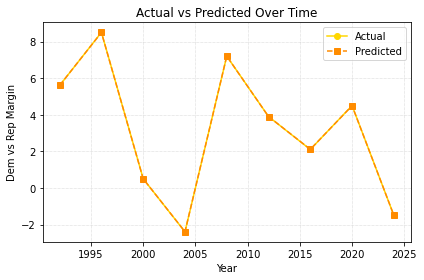

/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: Undefin


Rolling‐origin CV results:
   train_end_year  test_year  y_test    y_pred     error
0            2008       2012     3.9  4.069678  0.169678
1            2012       2016     2.1  0.350310 -1.749690
2            2016       2020     4.5  1.160182 -3.339818
3            2020       2024    -1.5  2.520998  4.020998

Rolling‐origin CV RMSE: 2.757


/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/nikhilvenky/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: Undefin

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1) Load and encode
df = pd.read_csv('election_project_data.csv')
for col in ['incumb_party_d', 'incumb_party_r', 'incumb_running_d', 'incumb_running_r']:
    df[col] = df[col].map({'Y': 1, 'N': 0})

# 2) Define your predictors including year
predictors = [
    c for c in df.select_dtypes(include=[np.number]).columns
    if c not in ['dem_rep_margin']
]
# this will include 'year' plus all your other numeric features

# 3) Extract X and y
X = df[predictors]
y = df['dem_rep_margin']

# 4) Standardize all predictors (including year)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) Fit RidgeCV on the raw target
alphas = np.logspace(-2, 2, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_scaled, y)

# 6) Make predictions on the full sample
df['predicted_margin'] = ridge_cv.predict(X_scaled)

# 7) Inspect coefficients + intercept
coef_df = pd.DataFrame({
    'feature': predictors + ['intercept'],
    'coefficient': list(ridge_cv.coef_) + [ridge_cv.intercept_]
})
print(coef_df)

# 8) Show performance table
df_final = df[['year', 'dem_rep_margin', 'predicted_margin']]
print(df_final)

# 9) Plot actual vs predicted over time
plt.plot(df['year'], df['dem_rep_margin'],
         marker='o', linestyle='-', color='gold', label='Actual')
plt.plot(df['year'], df['predicted_margin'],
         marker='s', linestyle='--', color='darkorange', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Dem vs Rep Margin')
plt.title('Actual vs Predicted Over Time')
plt.grid(linestyle=':', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 10) Rolling‐origin time‐series cross‐validation
min_train_size = 5   # minimum number of elections to start testing
cv_results = []

for i in range(min_train_size, len(df)):
    # train on all data up to but not including index i
    train_idx = df.index[:i]
    test_idx = df.index[i]
    
    X_train = df.loc[train_idx, predictors]
    y_train = df.loc[train_idx, 'dem_rep_margin']
    X_test  = df.loc[[test_idx], predictors]
    y_test  = df.loc[test_idx,  'dem_rep_margin']
    
    # re‐scale within each fold
    scaler_cv = StandardScaler()
    X_train_scaled = scaler_cv.fit_transform(X_train)
    X_test_scaled  = scaler_cv.transform(X_test)
    
    # fit & predict
    model = RidgeCV(alphas=alphas, cv=5)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)[0]
    
    cv_results.append({
        'train_end_year': df.loc[train_idx, 'year'].iloc[-1],
        'test_year':      df.loc[test_idx, 'year'],
        'y_test':         y_test,
        'y_pred':         y_pred,
        'error':          y_pred - y_test
    })

cv_df = pd.DataFrame(cv_results)
print("\nRolling‐origin CV results:")
print(cv_df)

rmse = np.sqrt(np.mean(cv_df['error']**2))
print(f"\nRolling‐origin CV RMSE: {rmse:.3f}")